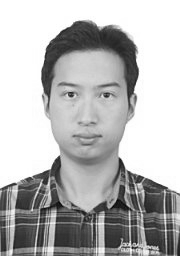

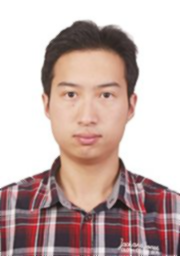

In [1]:
import PIL
from PIL import ImageFilter
from PIL import Image
img = Image.open('H:/py_test/citations.jpg')
img_gray = img.convert('L')
img_filter = img.filter(ImageFilter.SMOOTH)
#help(img.filter)
display(img_gray)
#help(img.quantize)
display(img_filter)

Original Image:


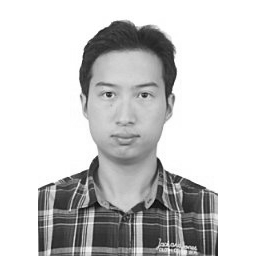

After compressed with quantization with 20:


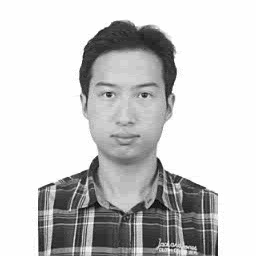

Compressed over the spatial space with 20:


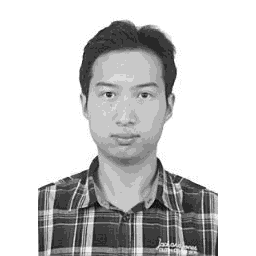

In [86]:
# convert the img_gray into non-overlapping 8 * 8 blocks
import numpy as np
from scipy.fftpack import dct
from scipy.fftpack import idct
#from matplotlib import pyplot
np_img = np.array(img_gray)
np_img = np.pad(np_img, ((0, 0), (38, 38)), constant_values=255)
img_test = Image.fromarray(np_img)
print('Original Image:')
display(img_test)
#print(np_img.shape)

# divide img_test to non-overlapping 8 * 8 blocks
block_size = 8
img_size = np_img.shape[0]
blocks = np.array([np_img[i:i+block_size, j:j+block_size] for j in range(0, img_size, block_size) for i in range(0, img_size, block_size)])


#do a DCT on the blocks
dct_blocks = np.array([dct(blocks[i,:,:], norm='ortho') for i in range(0, blocks.shape[0])])
#print(blocks[550,:,:])
#print(dct_blocks[550,:,:])

# quantization
N = 20
quant_dct_blocks = np.rint(dct_blocks / N) * N
#print(quant_dct_blocks[550,:,:])

# do an inverse dct on the quantized blocks 
recover_dct_blocks = np.array([idct(quant_dct_blocks[i,:,:], norm='ortho') for i in range(0, quant_dct_blocks.shape[0])])
#np.array([idct(quant_dct_blocks[i,:,:]) for i in range(0, quant_dct_blocks.shape[0])])
re_np = np.zeros([256, 256])
cnt = 0
for i in range(0, 256, 8):
    for j in range(0, 256, 8):
        re_np[j:j+8, i:i+8] = recover_dct_blocks[cnt,:,:]
        cnt += 1
img_output = Image.fromarray(re_np).convert('L')
print('After compressed with quantization with {}:'.format(N))
display(img_output)
# reorgainze the blocks into an image

np_img = np.rint(np_img / N) * N
print('Compressed over the spatial space with {}:'.format(N))
display(Image.fromarray(np_img).convert('L'))




In [26]:
a = np.array([1,2,3])
print(a)
quant_a = a /3
print(np.rint(quant_a))

[1 2 3]
[0. 1. 1.]
